In [80]:
import xgi
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import csv

In [81]:
hyperedge_list = []
with open("data_9_19_1231/hyperedges.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        # 读取每个超边的顶点列表，并将它们添加到 hyperedge_list 中
        hyperedge_list.append(row)

hyperedge_list = [[int(v) for v in edge] for edge in hyperedge_list]

hyperedge_list

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 16],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 16],
 [0, 1, 2, 3, 4, 5, 6, 8, 9, 16],
 [0, 1, 7, 8, 9, 16],
 [0, 1, 3, 7, 8, 9, 16],
 [0, 1, 4, 7, 8, 9, 16],
 [0, 1, 3, 4, 7, 8, 9, 16],
 [0, 1, 5, 7, 8, 9, 16],
 [0, 1, 3, 5, 7, 8, 9, 16],
 [0, 1, 4, 5, 7, 8, 9, 16],
 [0, 1, 3, 4, 5, 7, 8, 9, 16],
 [0, 1, 2, 3, 4, 5, 6, 7, 10, 16],
 [0, 1, 2, 3, 4, 5, 6, 8, 10, 16],
 [0, 1, 7, 8, 10, 16],
 [0, 1, 3, 7, 8, 10, 16],
 [0, 1, 4, 7, 8, 10, 16],
 [0, 1, 3, 4, 7, 8, 10, 16],
 [0, 1, 5, 7, 8, 10, 16],
 [0, 1, 3, 5, 7, 8, 10, 16],
 [0, 1, 4, 5, 7, 8, 10, 16],
 [0, 1, 3, 4, 5, 7, 8, 10, 16],
 [0, 1, 2, 3, 4, 5, 6, 9, 10, 16],
 [16, 9, 10, 7],
 [0, 1, 2, 3, 4, 5, 6, 11, 16],
 [0, 1, 2, 3, 4, 5, 7, 11, 16],
 [0, 1, 2, 3, 4, 6, 7, 11, 16],
 [0, 1, 5, 6, 7, 11, 16],
 [0, 1, 3, 5, 6, 7, 11, 16],
 [0, 1, 4, 5, 6, 7, 11, 16],
 [0, 1, 3, 4, 5, 6, 7, 11, 16],
 [0, 1, 2, 3, 4, 5, 8, 11, 16],
 [0, 1, 6, 8, 11, 16],
 [0, 1, 3, 6, 8, 11,

In [82]:
H = xgi.Hypergraph(hyperedge_list)
print(f"The hypergraph has {H.num_nodes} nodes and {H.num_edges} edges")
I = xgi.incidence_matrix(H, sparse=False)
print(I)


The hypergraph has 19 nodes and 236 edges
[[1 1 1 ... 0 1 0]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]


In [83]:
# 超边的度，即超边尺寸
DE_lst = I.sum(axis=0)
print(f"DE_lst: {DE_lst}")
DE = np.diag(DE_lst)

DE_lst: [16 10 10 10  6  7  7  8  7  8  8  9 10 10  6  7  7  8  7  8  8  9 10  4
  9  9  9  7  8  8  9  9  6  7  7  8  7  8  8  9  4  5  4  6  6  7  6  7
  7  8  4  4  5  5  6  6  6  7  6  6  7  7  7  8  6  7  7  8  4  9  9  6
  7  6  7  7  8  7  6  6  7  7  8  7  7  8  8  3  4  4  4  5  5  6  6  7
  6  7  7  8  3  4  9  9  5  6  6  7  9  4  5  4  5  6  5  6  6  7  6  7
  7  8  9  9  4  5  4  6  6  7  6  7  7  8  3  4  4  5  4  5  6  5  6  6
  7 15 15 15 15 15 15 15 15 10  4  4 11  4 11 12 11 12 12 13  8  3  8  6
  6  6  6  7  6  7  6  6  6  6  6  5  5  5  5  5  6  5  4  6  5  5  4  4
  3  5  5  5  5  4  5  5  5  6  5  4  4  4  4  4  5  4  4  4  4  4  4  4
  4  3  3  4  4  4  3  3  3  3  4  4  4  4  4  4  4  3  3  3]


In [84]:
weights = [2**(x-1) - 1 for x in DE_lst]
print(f"weights: {weights}")
W = np.diag(weights)

weighted_node_degree = np.dot(I, weights)
weighted_node_degree

weights: [32767, 511, 511, 511, 31, 63, 63, 127, 63, 127, 127, 255, 511, 511, 31, 63, 63, 127, 63, 127, 127, 255, 511, 7, 255, 255, 255, 63, 127, 127, 255, 255, 31, 63, 63, 127, 63, 127, 127, 255, 7, 15, 7, 31, 31, 63, 31, 63, 63, 127, 7, 7, 15, 15, 31, 31, 31, 63, 31, 31, 63, 63, 63, 127, 31, 63, 63, 127, 7, 255, 255, 31, 63, 31, 63, 63, 127, 63, 31, 31, 63, 63, 127, 63, 63, 127, 127, 3, 7, 7, 7, 15, 15, 31, 31, 63, 31, 63, 63, 127, 3, 7, 255, 255, 15, 31, 31, 63, 255, 7, 15, 7, 15, 31, 15, 31, 31, 63, 31, 63, 63, 127, 255, 255, 7, 15, 7, 31, 31, 63, 31, 63, 63, 127, 3, 7, 7, 15, 7, 15, 31, 15, 31, 31, 63, 16383, 16383, 16383, 16383, 16383, 16383, 16383, 16383, 511, 7, 7, 1023, 7, 1023, 2047, 1023, 2047, 2047, 4095, 127, 3, 127, 31, 31, 31, 31, 63, 31, 63, 31, 31, 31, 31, 31, 15, 15, 15, 15, 15, 31, 15, 7, 31, 15, 15, 7, 7, 3, 15, 15, 15, 15, 7, 15, 15, 15, 31, 15, 7, 7, 7, 7, 7, 15, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3]


array([191813, 191004, 184794, 189240, 188492, 188868, 184582, 167393,
       153474, 159740, 160907, 160455, 149570, 148907, 148405,  46826,
        13366, 145031,   1130])

<Axes: >

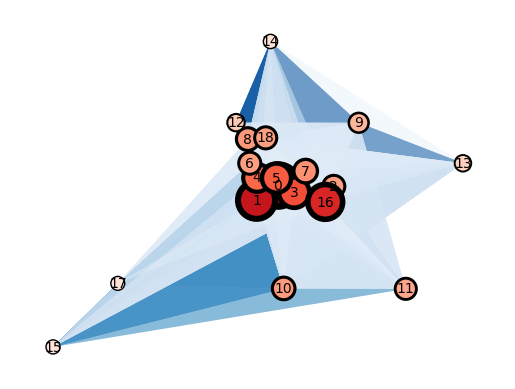

In [85]:

pos = xgi.barycenter_spring_layout(H)
xgi.draw(
    H,
    pos,
    node_labels=True,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
)

# pos_spiral = xgi.spiral_layout(H)
# xgi.draw(H, pos=pos_spiral, node_labels=True)

In [86]:
H.nodes.degree.asdict()

{0: 187,
 1: 160,
 2: 70,
 3: 120,
 4: 104,
 5: 112,
 6: 70,
 7: 79,
 8: 74,
 9: 56,
 10: 73,
 11: 65,
 12: 42,
 13: 37,
 14: 23,
 15: 22,
 16: 146,
 17: 21,
 18: 70}

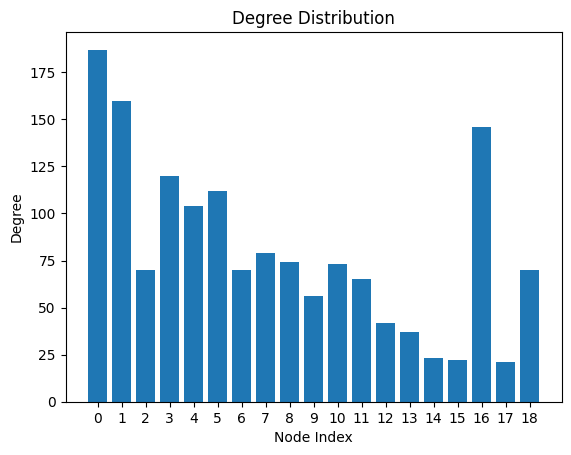

In [87]:
# 假设你已经有了表示每个节点度数的字典 degree_dict
degree_values = H.nodes.degree.asdict().values()
# degree_values = weighted_node_degree

# # 绘制度数随节点序号变化的曲线图
# plt.plot(range(len(degree_values)), H.nodes.degree.asdict().values())
# plt.xlabel('Node Index')
# plt.ylabel('Degree')
# plt.title('Degree Distribution')
# plt.show()

# 绘制节点度数的柱状图
plt.bar(range(len(degree_values)), degree_values)
plt.xticks(range(len(degree_values)), range(len(degree_values)))
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.title('Degree Distribution')
plt.show()